In [1]:
%matplotlib inline
import seaborn
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (16, 9)
from matplotlib import pyplot as plt

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Mandelbrotova množina

**Mandelbrotova množina** je množina bodů komplexní roviny, které jsou odvozeny od rekurzivních procesů s komplexními čísly patřícími této množině a jejímu okolí. Mandelbrotova množina je jeden z nejznámějších fraktálů, přesněji řečeno fraktálem je její okraj. K jejímu určení se používá zobrazení, které každému komplexnímu číslu $c$ přiřazuje určitou posloupnost komplexních čísel $z_n$. Tato posloupnost je určena následujícím rekurzivním předpisem:

$$z_0 = 0, \quad z_{n+1} = z_n^2 + c$$

Madelbrodova množina je pak definována jako množina komplexních čísel $c$, pro která je posloupnost $z_0, z_1, z_2, \dots$  omezená, tj. že splňuje následující podmínku:

Existuje reálné číslo $m$ takové, že pro všechna $n$ je $|z_n| \le m$.

Lze dokázat, že překročí-li absolutní hodnota některého členu posloupnosti $z_n$ hodnotu 2, pak tato poslupnost není omezená (jde do nekonečna). Odtud je zřejmé, že lze ve výše uvedené definici položit $m = 2$, aniž by tím došlo ke změně jejího významu.

Na začátek importujeme balík NumPy, z nějž využijeme funkce pro tvorbu vektorů a matic.

In [2]:
import numpy as np

Dále si definujeme počet iterací pro výpočet, tedy délku posloupnosti $n$, hustotu sítě v níž budeme počítat a její meze.

In [3]:
ITERATIONS = 100
DENSITY = 1000
x_min, x_max = -2.68, 1.32
y_min, y_max = -1.5, 1.5

Nyní získáme matice souřadnic pro reálnou a imaginární část komplexních čísel a z nich vytvoříme Gaussovu rovinu.

In [4]:
x, y = np.meshgrid(np.linspace(x_min, x_max, DENSITY),
                   np.linspace(y_min, y_max, DENSITY))
c = x + y*1j

Incializujeme matici pro uložení výsledného fraktálu. Důrazně specifikujeme použitý datový typ a rovnou volíme i jeho rozzsah. Postupnou iterací spočteme množinu podle rekurzivního vztahu výše.

In [5]:
z = np.copy(c)
fractal = np.ones_like(z, dtype=np.uint8) * 255
for n in range(ITERATIONS):
    mask = abs(z) <= 10
    z[mask] *= z[mask]
    z[mask] += c[mask]
    fractal[(fractal == 255) & ~mask] = 254 * n / ITERATIONS

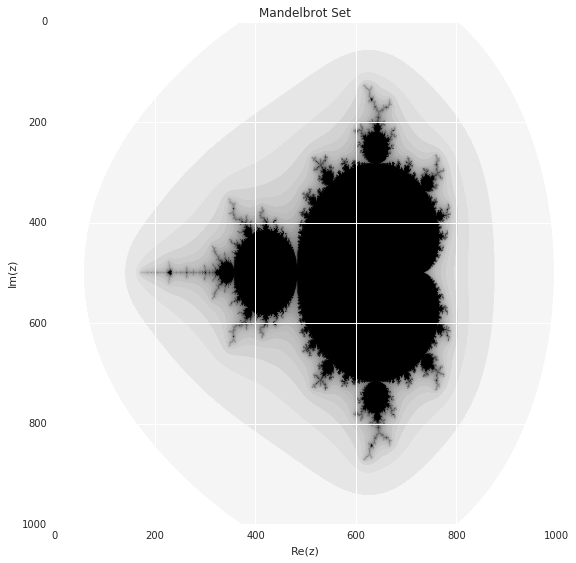

In [6]:
plt.title('Mandelbrot Set')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.imshow(np.log(fractal));

Jen pro zajímavost uvádíme funkčně jinak stejný kód, ale psaný dříve v minulosti velice populárním jazykem FORTRAN.

```fortran
program Mandelbrot
use types, only: dp
use constants, only: I
use utils, only: savetxt, linspace, meshgrid
implicit none

integer, parameter :: ITERATIONS = 100
integer, parameter :: DENSITY = 1000
real(dp) :: x_min, x_max, y_min, y_max
real(dp), dimension(DENSITY, DENSITY) :: x, y
complex(dp), dimension(DENSITY, DENSITY) :: c, z
integer, dimension(DENSITY, DENSITY) :: fractal
integer :: n
x_min = -2.68_dp
x_max = 1.32_dp
y_min = -1.5_dp
y_max = 1.5_dp

call meshgrid(linspace(x_min, x_max, DENSITY), &
    linspace(y_min, y_max, DENSITY), x, y)
c = x + I*y
z = c
fractal = 255

do n = 1, ITERATIONS
    print "('Iteration ', i0)", n
    where (abs(z) <= 10) z = z**2 + c
    where (fractal == 255 .and. abs(z) > 10) fractal = 254 * (n-1) / ITERATIONS
end do

print *, "Saving..."
call savetxt("fractal.dat", log(real(fractal, dp)))
call savetxt("coord.dat", reshape([x_min, x_max, y_min, y_max], [4, 1]))
end program
```

## Reference

* Přispěvatelé Wikipedie, *Mandelbrotova množina* [online], Wikipedie: Otevřená encyklopedie, c2013, Datum poslední revize 8. 3. 2013, 22:19 UTC, [citováno 13. 3. 2013] <http://cs.wikipedia.org/w/index.php?title=Mandelbrotova_množina>

* Ondřej Čertík, *Mandelbrot set* [online], Fortran 90 -- Fortran90 1.0 documentation. [citováno 13. 03. 2013] <http://fortran90.org/src/rosetta.html#mandelbrot-set>